In [169]:
import pandas as pd
import numpy as np
df=pd.read_excel("D:\\ExcelR Assignments\\Assignment 8\\EastWestAirlines.xlsx",sheet_name="data")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [171]:
# Handling missing values

df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [91]:
# Here we can see that there are no null values in the dataset.

In [173]:
#Removng the outliers by using the iqr method

# Step 1: Calculate IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Step 2: Identify outliers
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Step 3: Drop outliers
df_final = df[~outliers.any(axis=1)]

df_final

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [179]:
# Scaling the features using StandardScaler

numerical_cols = df_final.iloc[:,1:]
numerical_cols

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
5,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [188]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_final = ss.fit_transform(numerical_cols)
df_final=pd.DataFrame(df_final)
df_final.columns=list(numerical_cols)
df_final

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.438859,0.0,-0.719055,0.0,0.0,-0.783131,-1.081732,-0.378837,-0.409708,1.503693,-0.623072
1,-0.647735,0.0,-0.719055,0.0,0.0,-0.780130,-0.952735,-0.378837,-0.409708,1.488035,-0.623072
2,-0.128773,0.0,-0.719055,0.0,0.0,-0.494075,-0.694742,-0.378837,-0.409708,1.520330,-0.623072
3,-0.752607,0.0,-0.719055,0.0,0.0,-0.759268,-1.081732,-0.378837,-0.409708,1.480206,-0.623072
4,-0.714019,0.0,-0.719055,0.0,0.0,-0.795867,-1.210728,-0.378837,-0.409708,1.475312,-0.623072
...,...,...,...,...,...,...,...,...,...,...,...
2870,-0.665761,0.0,-0.719055,0.0,0.0,-0.171862,-0.694742,0.948432,1.653181,-1.235018,1.604952
2871,0.411806,0.0,-0.719055,0.0,0.0,-0.724061,-0.565745,-0.378837,-0.409708,-1.238933,1.604952
2872,0.628028,0.0,1.013789,0.0,0.0,1.066780,-0.178756,-0.378837,-0.409708,-1.235507,1.604952
2873,0.189152,0.0,-0.719055,0.0,0.0,-0.759268,-1.081732,2.939335,1.653181,-1.235997,-0.623072


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


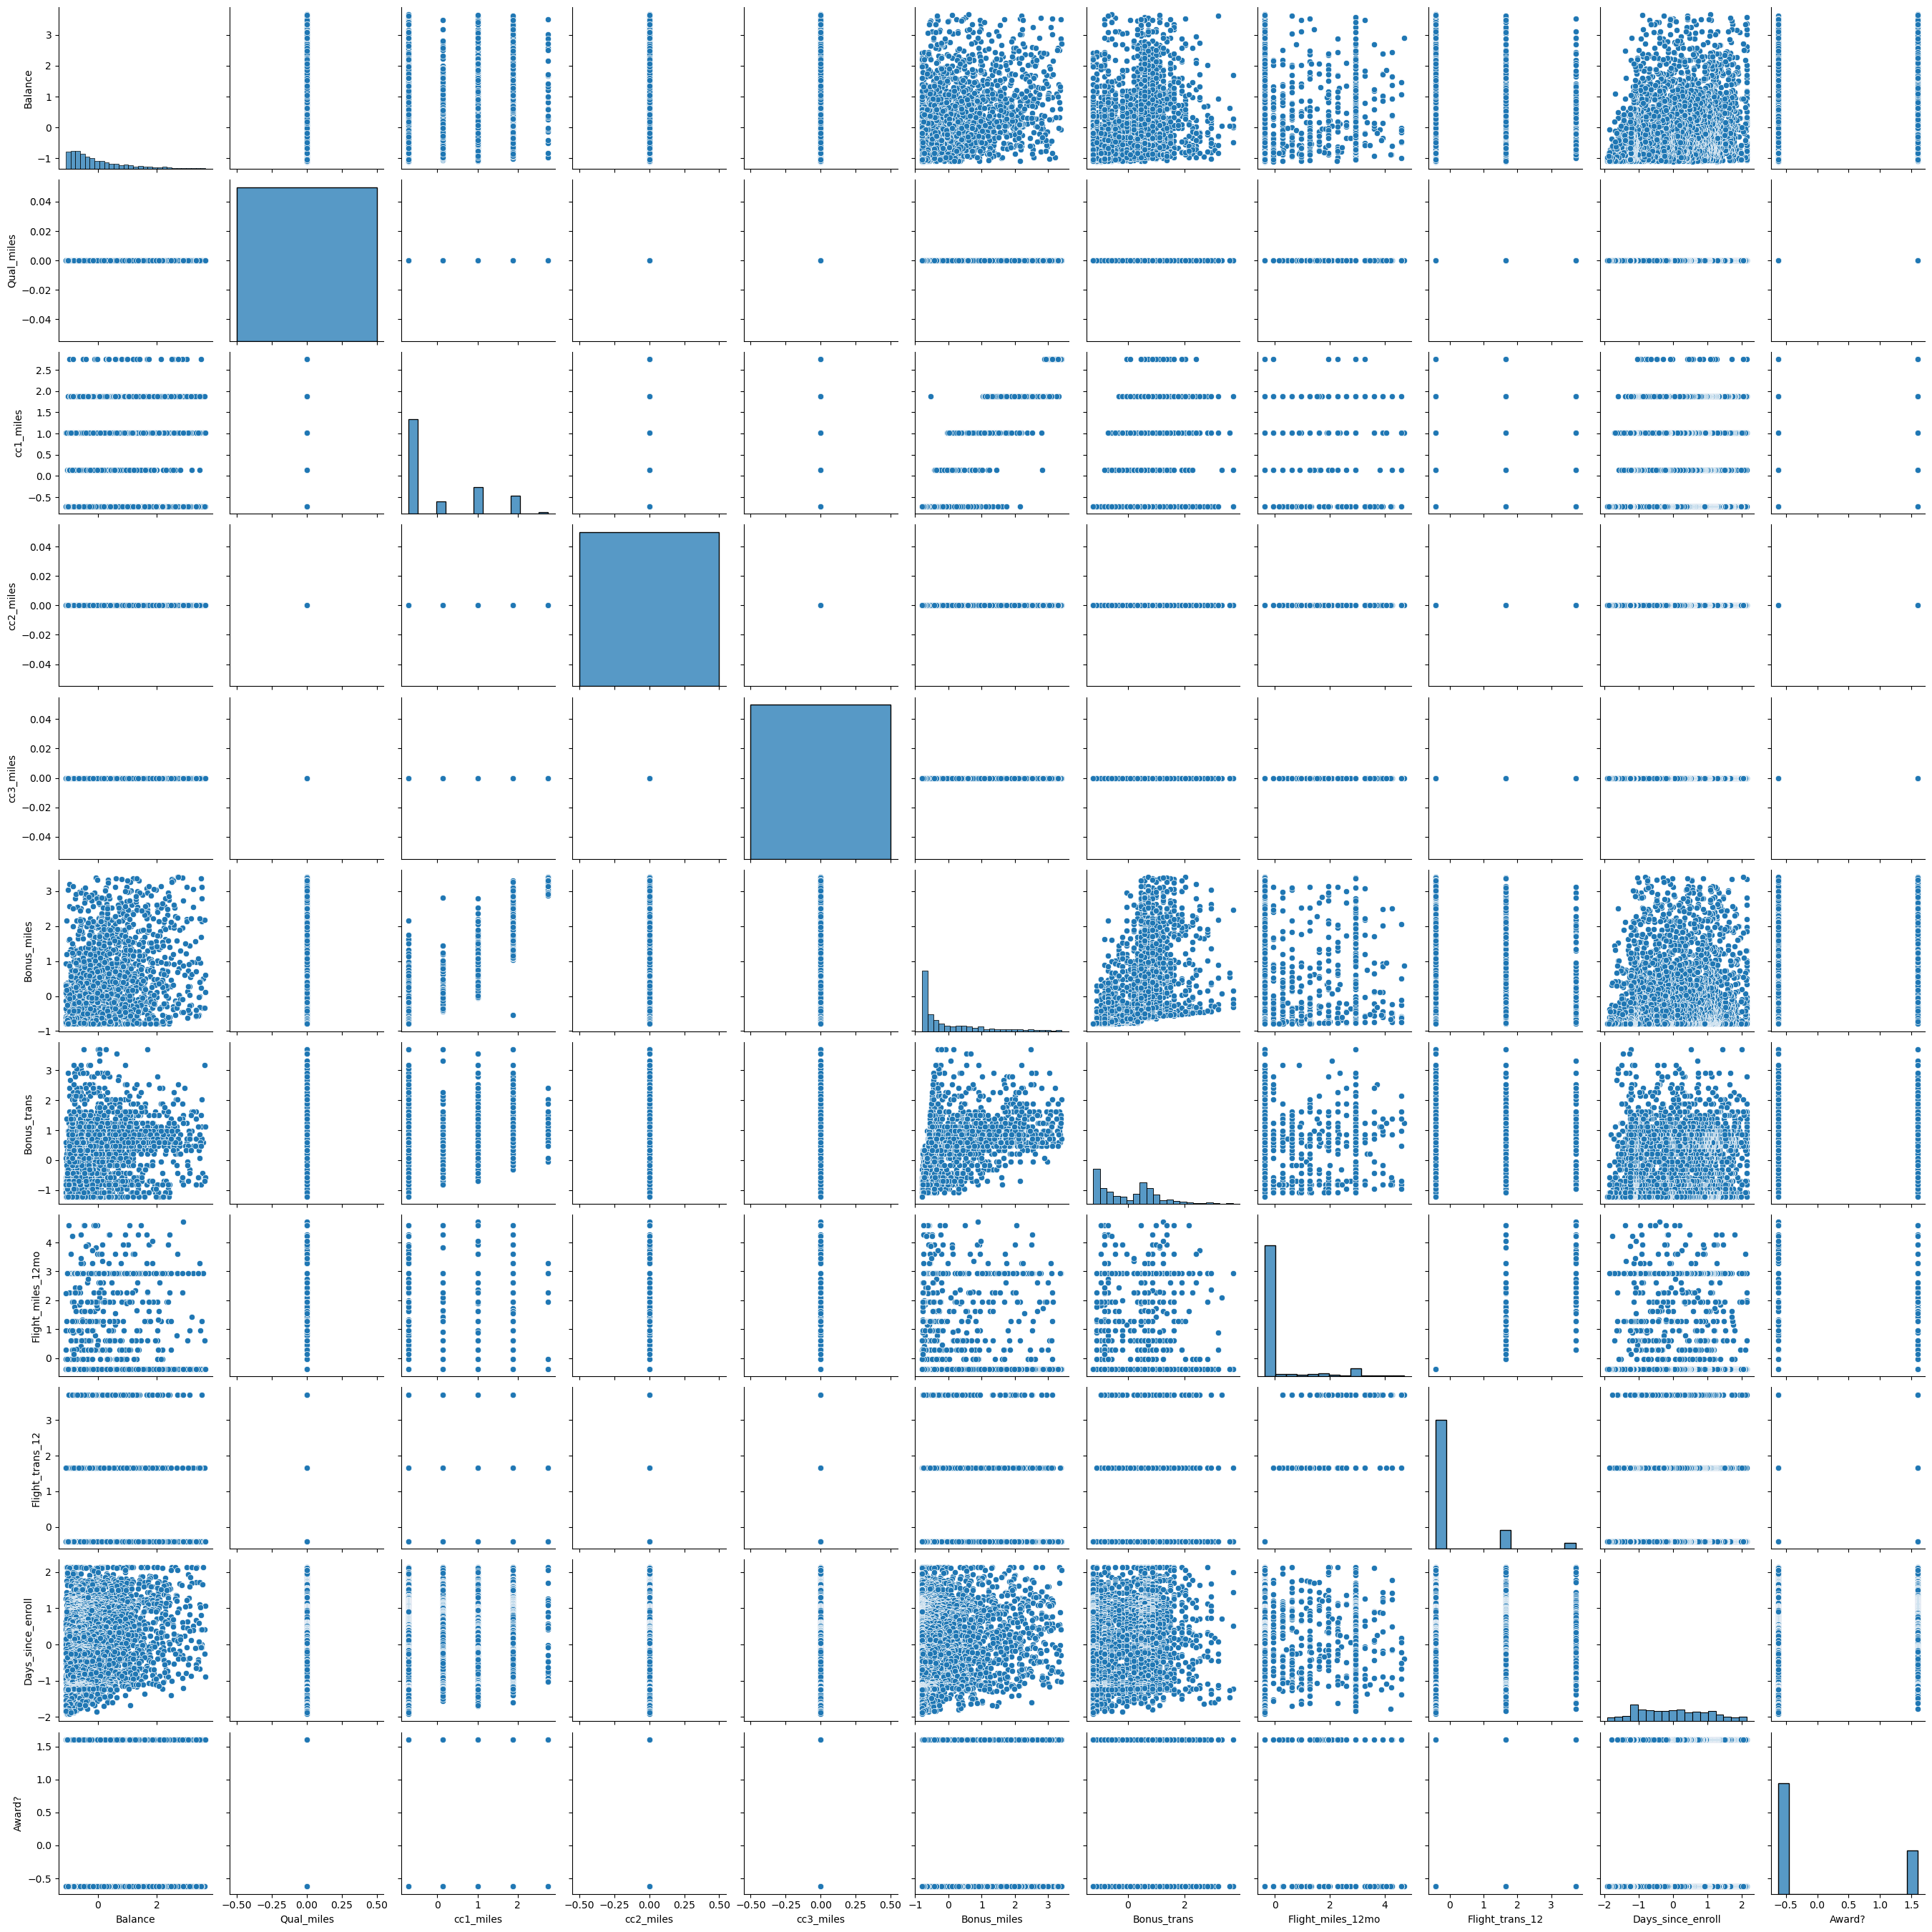

In [192]:
# Pairplot to visualize relationships between features
import seaborn as sns

sns.pairplot(df_final)
plt.show()

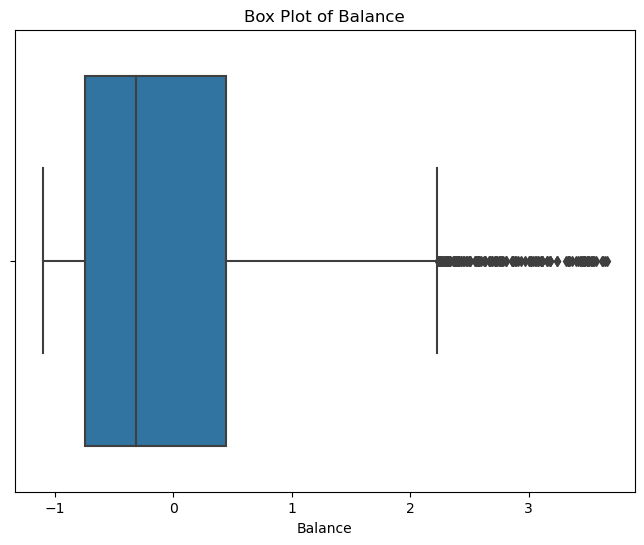

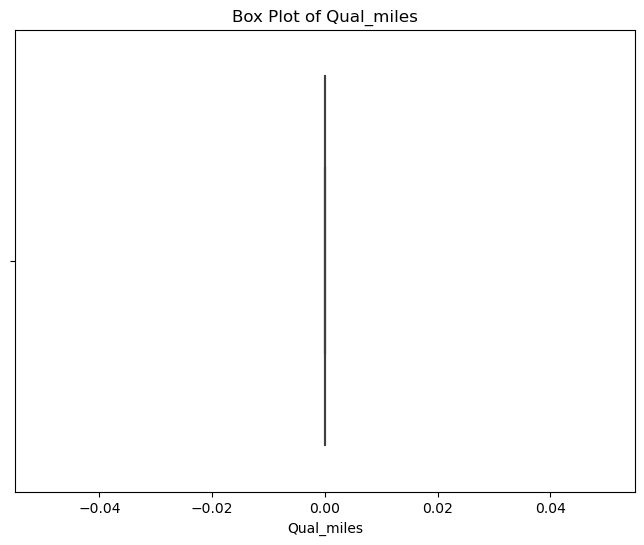

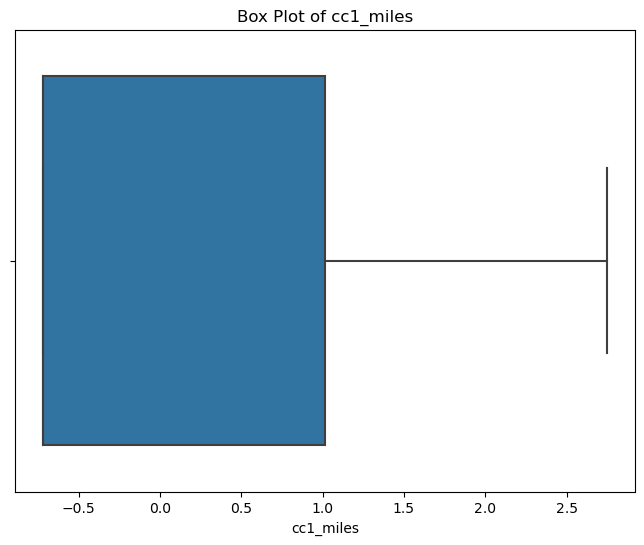

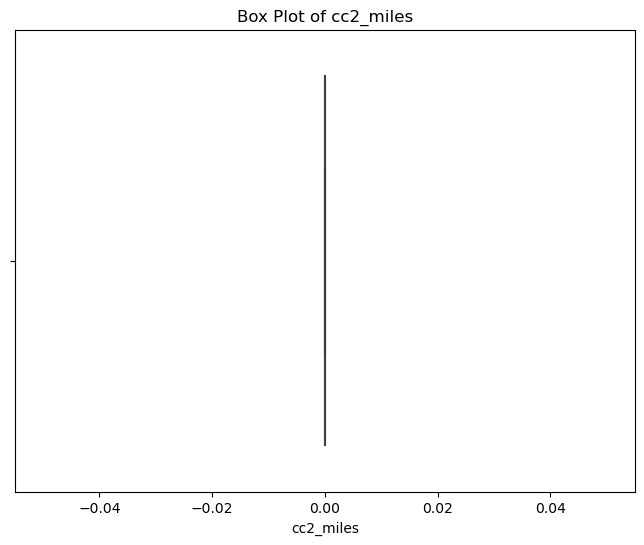

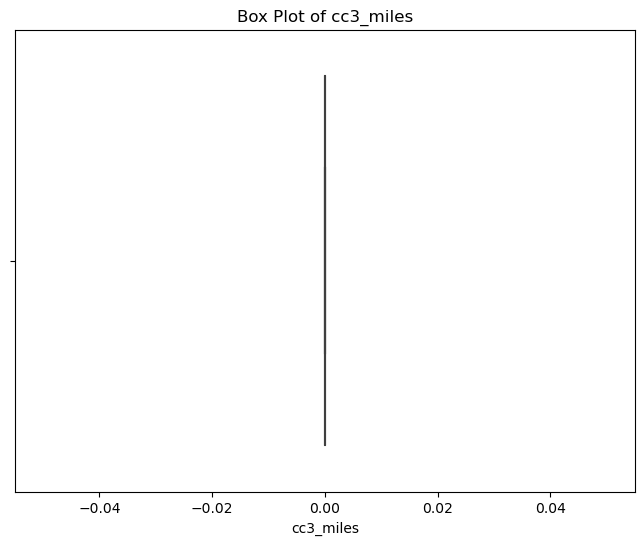

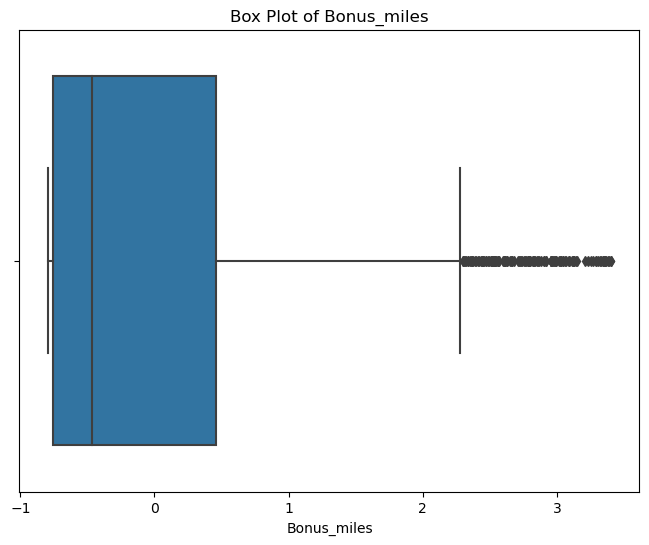

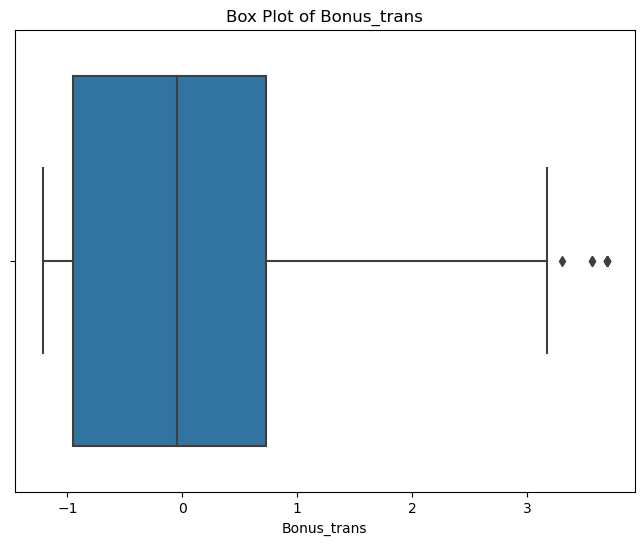

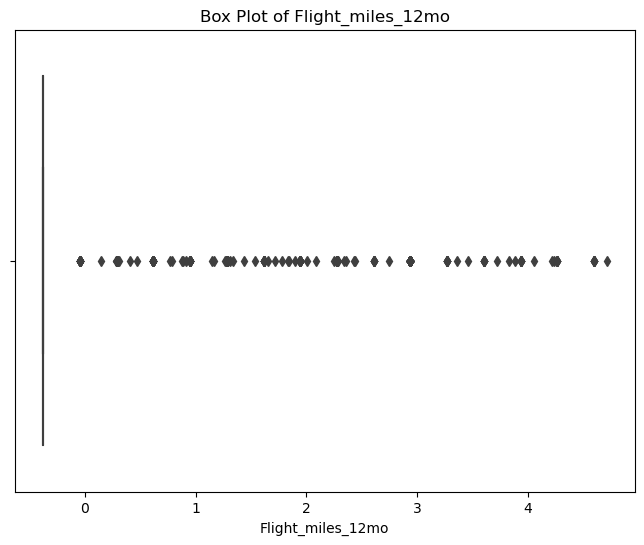

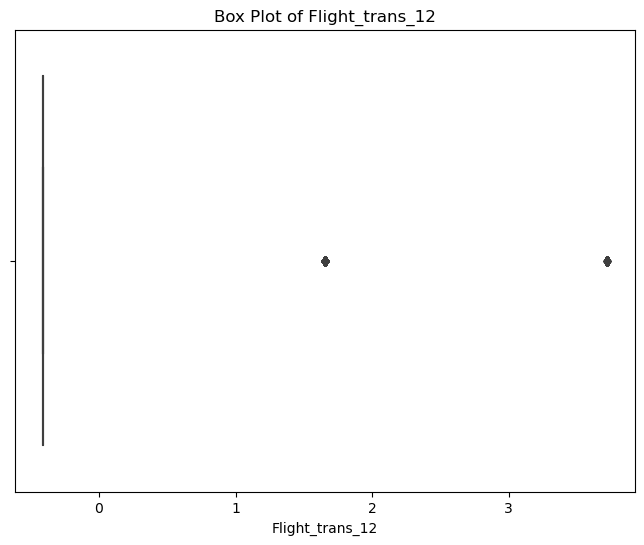

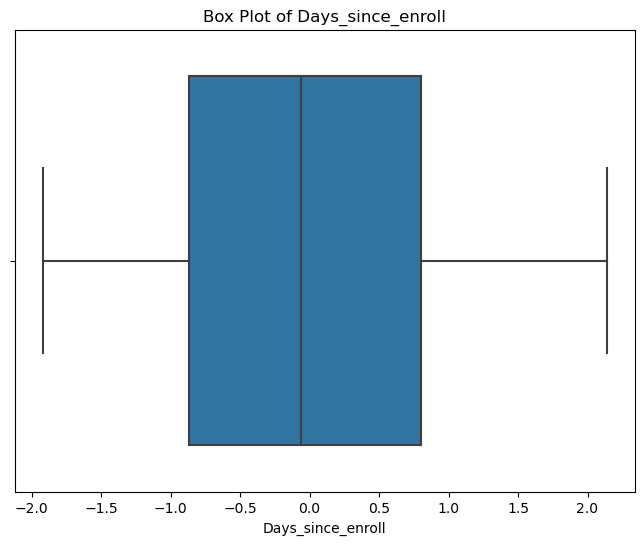

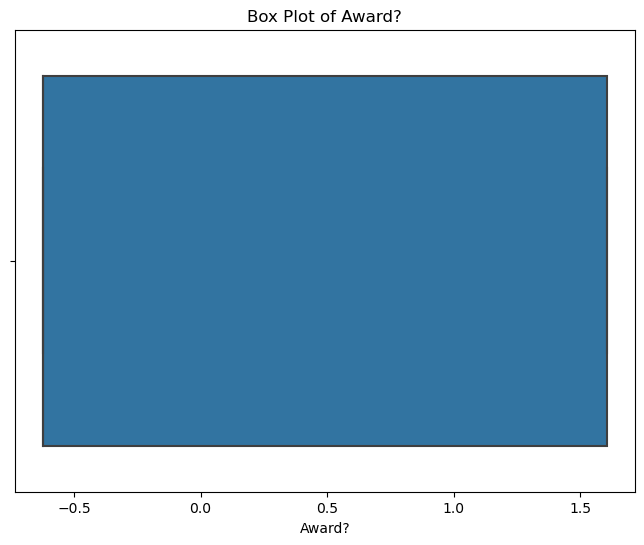

In [196]:
# Box plots to visualize distributions and identify outliers
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_final[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

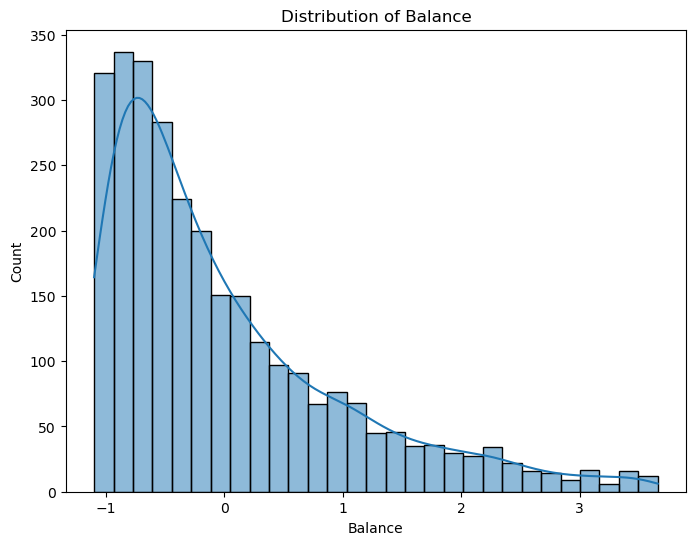

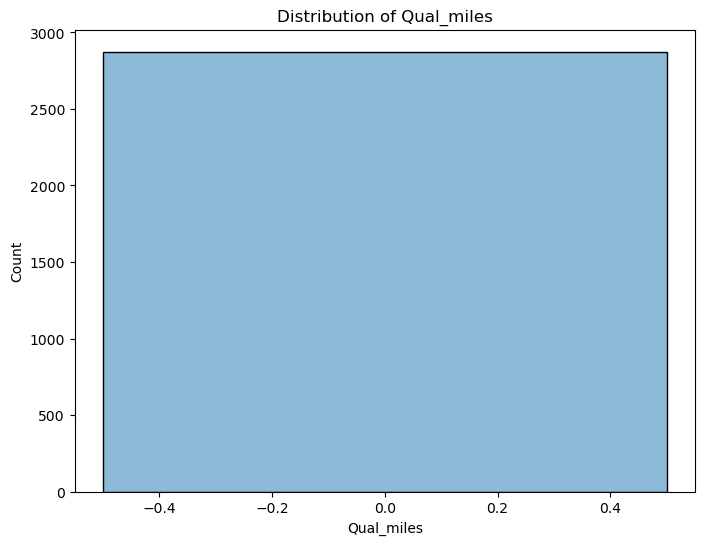

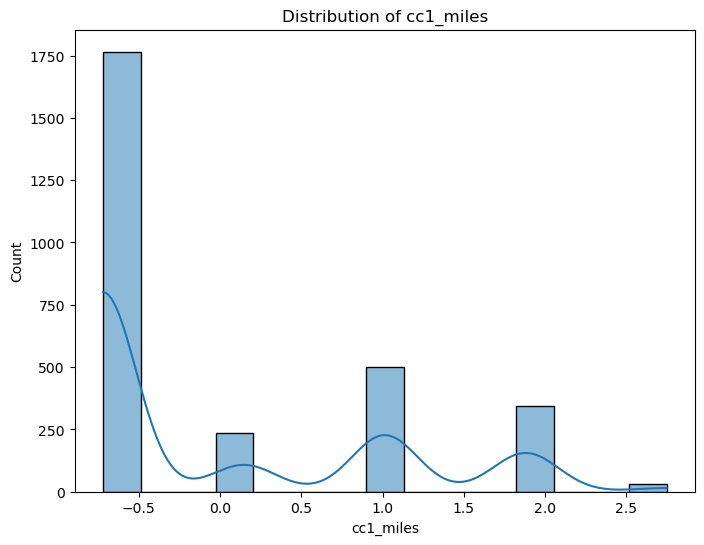

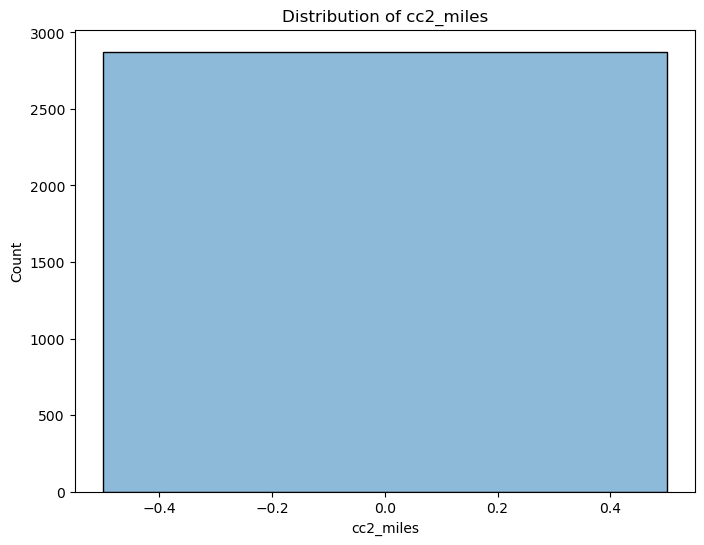

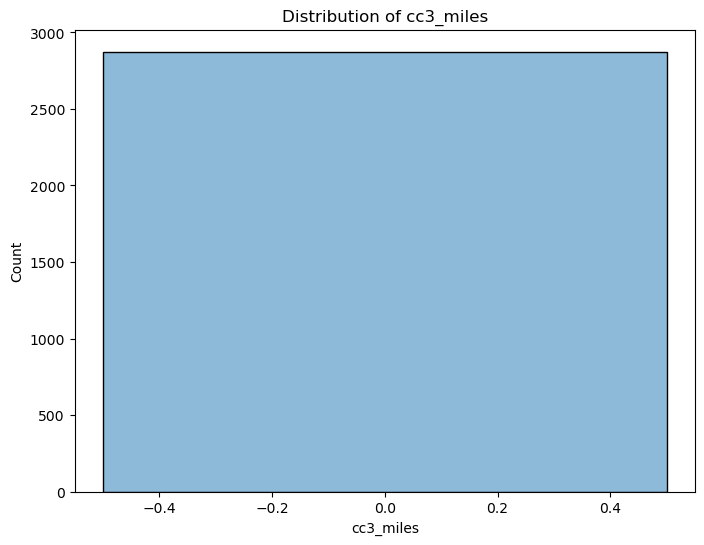

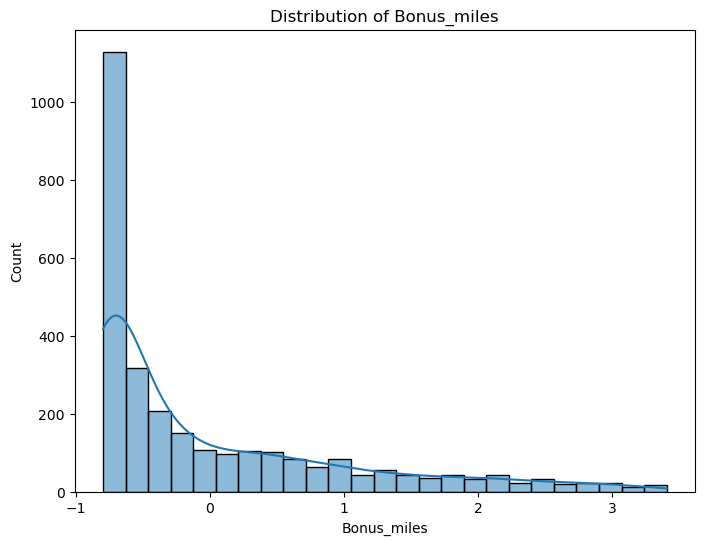

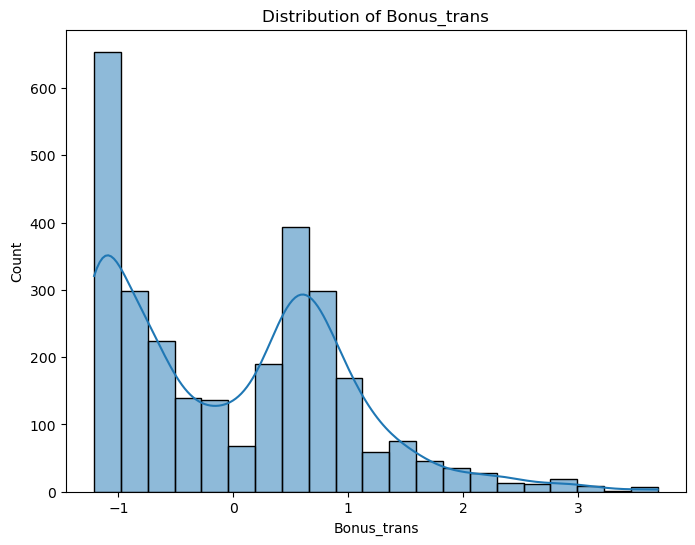

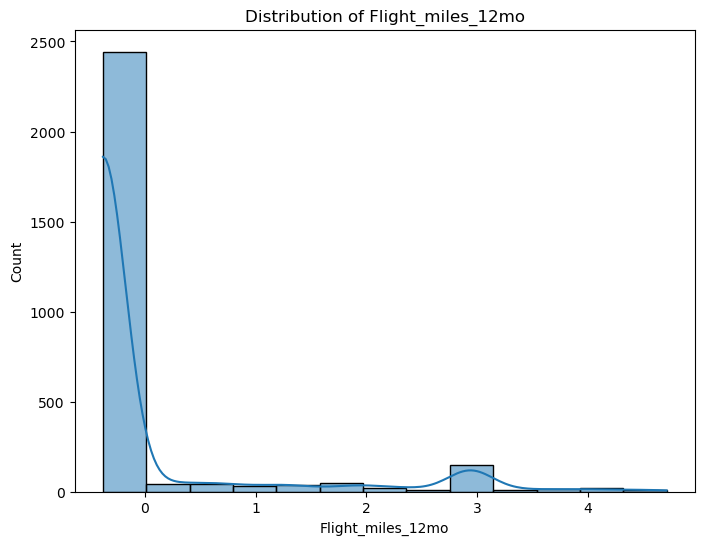

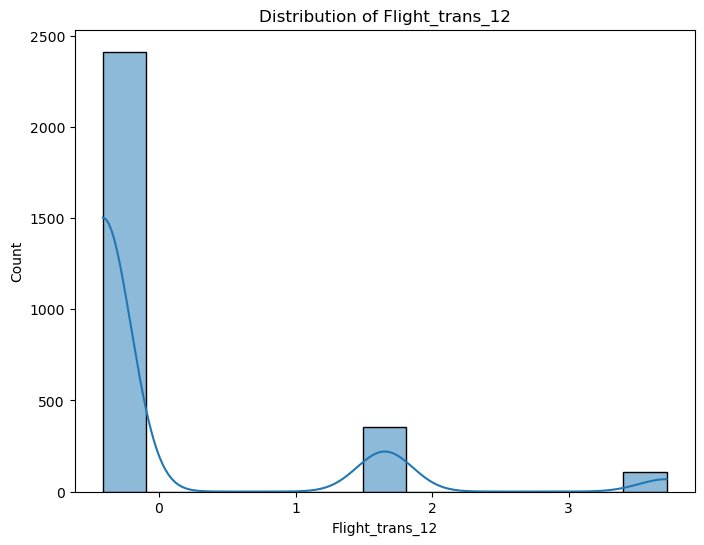

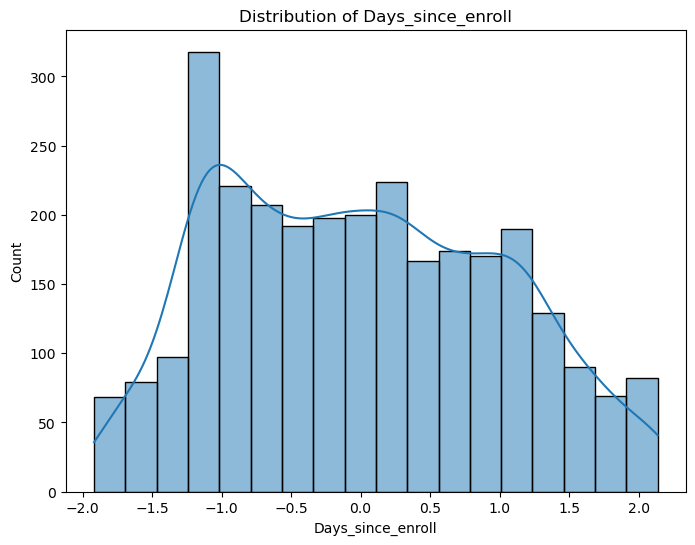

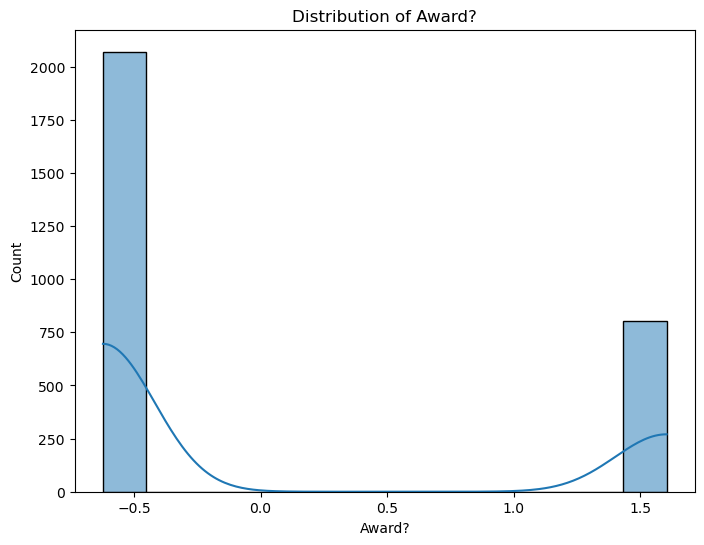

In [198]:
# Histograms to visualize the distribution of each numerical feature
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_final[col], kde=True)  # Added KDE for density estimation
    plt.title(f'Distribution of {col}')
    plt.show()

In [202]:
df_final.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Balance,1.000000,NaN,0.461179,NaN,NaN,0.456281,0.358318,0.158173,0.152763,0.236048,0.049305
Qual_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc1_miles,0.461179,NaN,1.000000,NaN,NaN,0.905322,0.629604,0.079288,0.065973,0.179651,0.330855
cc2_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc3_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bonus_miles,0.456281,NaN,0.905322,NaN,NaN,1.000000,0.620072,0.107435,0.092804,0.153825,0.356086
Bonus_trans,0.358318,NaN,0.629604,NaN,NaN,0.620072,1.000000,0.104399,0.113083,0.132153,0.253705
Flight_miles_12mo,0.158173,NaN,0.079288,NaN,NaN,0.107435,0.104399,1.000000,0.858979,0.033528,0.122343
Flight_trans_12,0.152763,NaN,0.065973,NaN,NaN,0.092804,0.113083,0.858979,1.000000,0.032220,0.133199
Days_since_enroll,0.236048,NaN,0.179651,NaN,NaN,0.153825,0.132153,0.033528,0.032220,1.000000,0.138270


In [204]:
df_final.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,2.875000e+03,2875.0,2.875000e+03,2875.0,2875.0,2.875000e+03,2.875000e+03,2.875000e+03,2.875000e+03,2.875000e+03,2.875000e+03
mean,-7.908650e-17,0.0,-7.908650e-17,0.0,0.0,-5.931487e-17,8.402940e-17,1.482872e-17,2.965744e-17,-7.908650e-17,9.885812e-18
std,1.000174e+00,0.0,1.000174e+00,0.0,0.0,1.000174e+00,1.000174e+00,1.000174e+00,1.000174e+00,1.000174e+00,1.000174e+00
min,-1.098253e+00,0.0,-7.190547e-01,0.0,0.0,-7.958670e-01,-1.210728e+00,-3.788372e-01,-4.097077e-01,-1.917616e+00,-6.230716e-01
25%,-7.408945e-01,0.0,-7.190547e-01,0.0,0.0,-7.592685e-01,-9.527351e-01,-3.788372e-01,-4.097077e-01,-8.672958e-01,-6.230716e-01
50%,-3.171815e-01,0.0,-7.190547e-01,0.0,0.0,-4.664800e-01,-4.975903e-02,-3.788372e-01,-4.097077e-01,-5.967701e-02,-6.230716e-01
75%,4.492551e-01,0.0,1.013789e+00,0.0,0.0,4.549983e-01,7.242205e-01,-3.788372e-01,-4.097077e-01,8.020114e-01,1.604952e+00
max,3.656806e+00,0.0,2.746632e+00,0.0,0.0,3.404329e+00,3.691142e+00,4.711239e+00,3.716071e+00,2.137849e+00,1.604952e+00


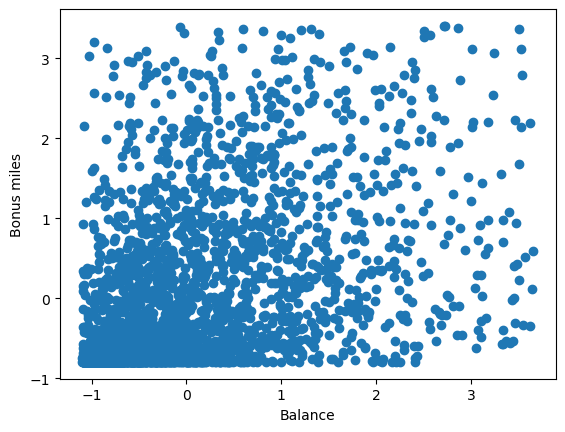

In [352]:
plt.scatter(x=df_final.iloc[:,0:1],y=df_final.iloc[:,5:6])
plt.xlabel('Balance')
plt.ylabel('Bonus miles')
plt.show()

In [354]:
# There is a positive relationship between Balance and Bonus miles.
# If the Balance increases then the bonus miles also increases

Silhouette score for K-Means: 0.4127424303078537


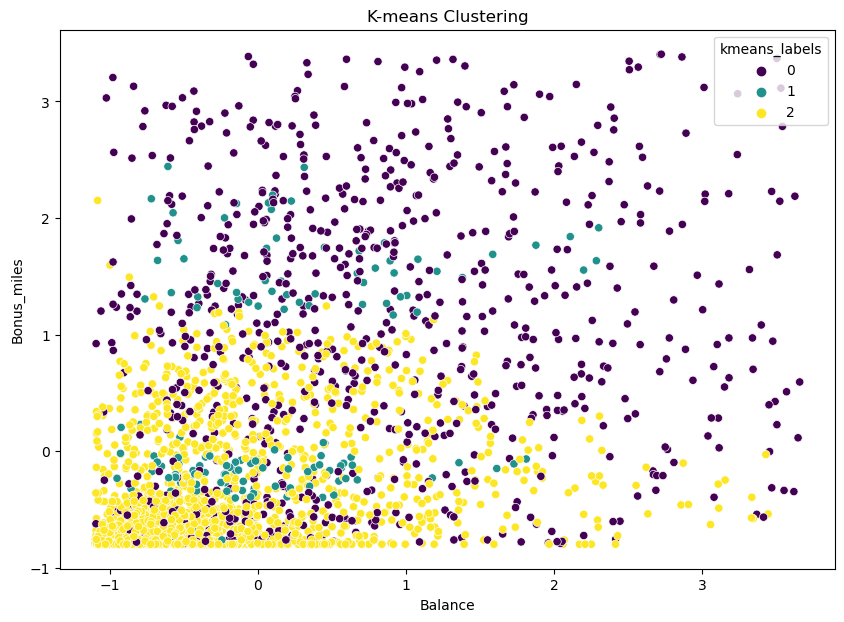

In [350]:
# K-Means Clustering

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42) # finding optimal k using elbow method
kmeans.fit(df_final)
df_final['kmeans_labels'] = kmeans.labels_
print(f"Silhouette score for K-Means: {silhouette_score(df_final, df_final['kmeans_labels'])}")

# Visualizations for Clusters with KMeans
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Balance', y='Bonus_miles', hue='kmeans_labels', data=df_final, palette='viridis') # Replace with relevant columns for your dataset
plt.title('K-means Clustering')
plt.show()

sihouette score:  0.5462849851767173


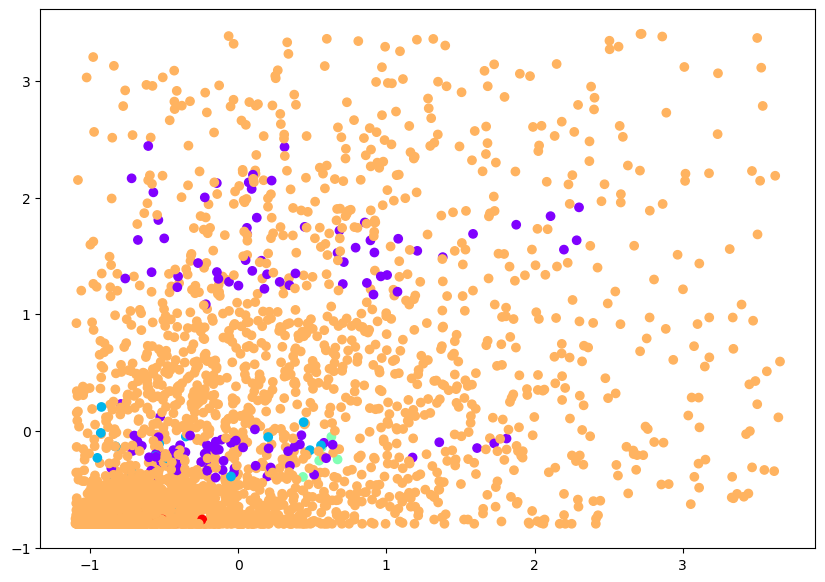

In [356]:
# Agglomerative clustering for single  linkage

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5,linkage='single')

cluster.fit(df_final)
df_final["Agg_single"] = cluster.fit_predict(df_final)

df_final.head()
df_final["Agg_single"].value_counts()

plt.figure(figsize=(10, 7))  
plt.scatter(x=df_final.iloc[:,0:1],y=df_final.iloc[:,5:6], c=cluster.labels_, cmap='rainbow')  

from sklearn.metrics import silhouette_score
m1= silhouette_score(df_final,df_final["Agg_single"]) 
print("sihouette score: ",m1)

sihouette score:  0.3679599016922505


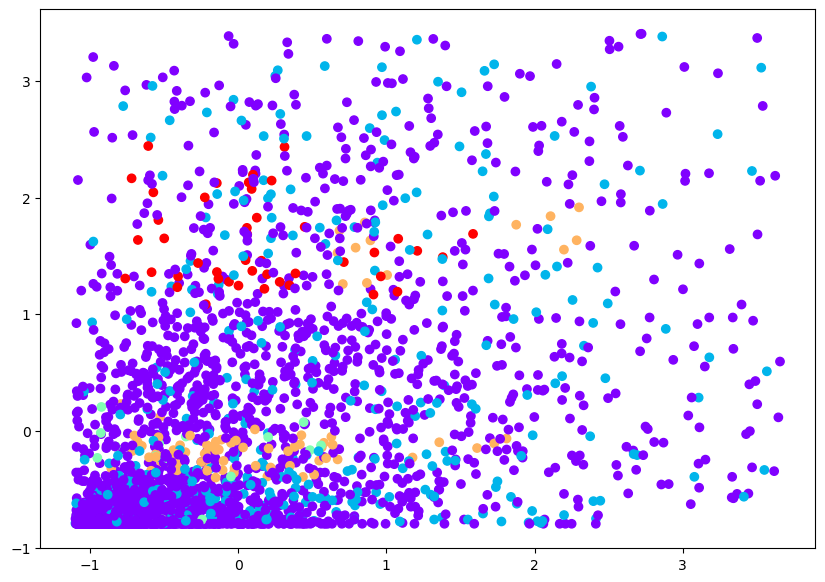

In [358]:
# Agglomerative clustering for complete  linkage


from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5,linkage='complete')

cluster.fit(df_final)
df_final["Agg_single"] = cluster.fit_predict(df_final)

df_final.head()
df_final["Agg_single"].value_counts()

plt.figure(figsize=(10, 7))  
plt.scatter(x=df_final.iloc[:,0:1],y=df_final.iloc[:,5:6], c=cluster.labels_, cmap='rainbow')  

from sklearn.metrics import silhouette_score
m1= silhouette_score(df_final,df_final["Agg_single"]) 
print("sihouette score: ",m1)

sihouette score:  0.37372892551530934


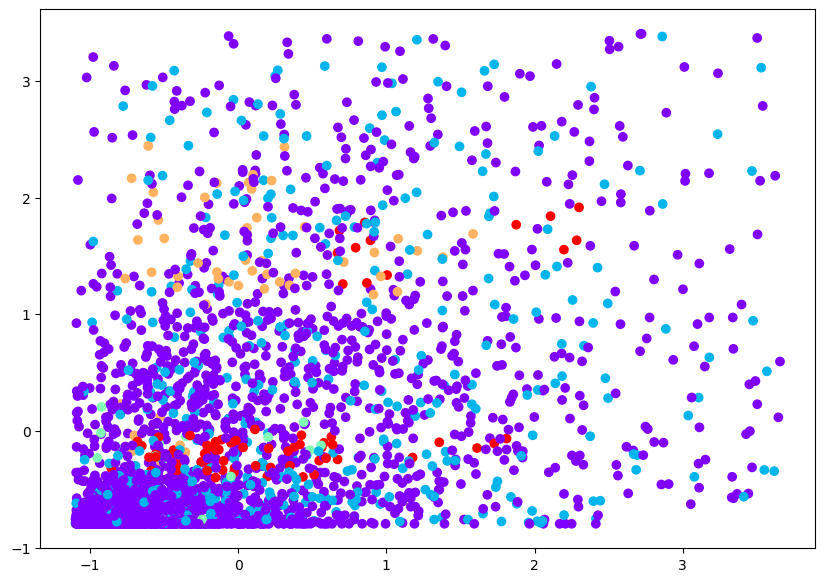

In [360]:
# Agglomerative clustering for average  linkage


from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5,linkage='average')

cluster.fit(df_final)
df_final["Agg_single"] = cluster.fit_predict(df_final)

df_final.head()
df_final["Agg_single"].value_counts()

plt.figure(figsize=(10, 7))  
plt.scatter(x=df_final.iloc[:,0:1],y=df_final.iloc[:,5:6], c=cluster.labels_, cmap='rainbow')  

from sklearn.metrics import silhouette_score
m1= silhouette_score(df_final,df_final["Agg_single"]) 
print("sihouette score: ",m1)

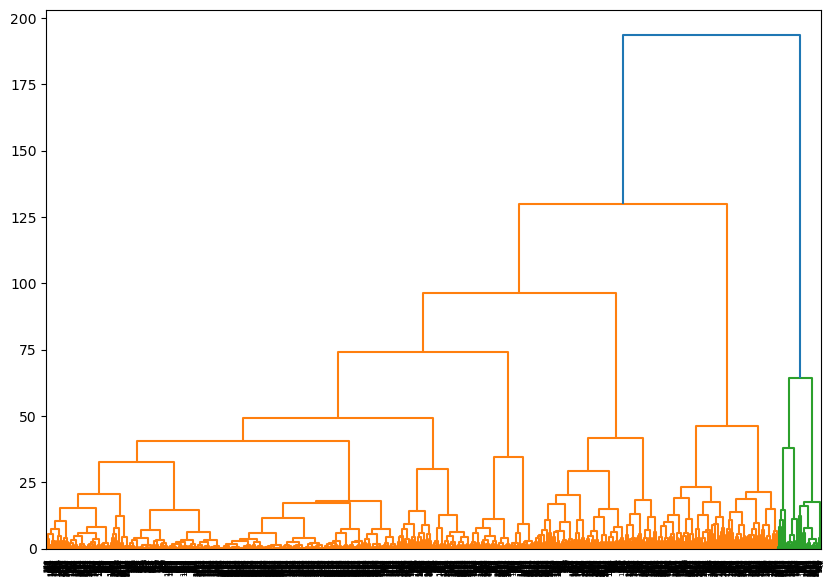

In [326]:
# Hierarchical Clustering ward linkage

from scipy.cluster.hierarchy import linkage, dendrogram
linked = linkage(df_final, 'ward') # Use 'ward' linkage method, experiment with others if needed
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

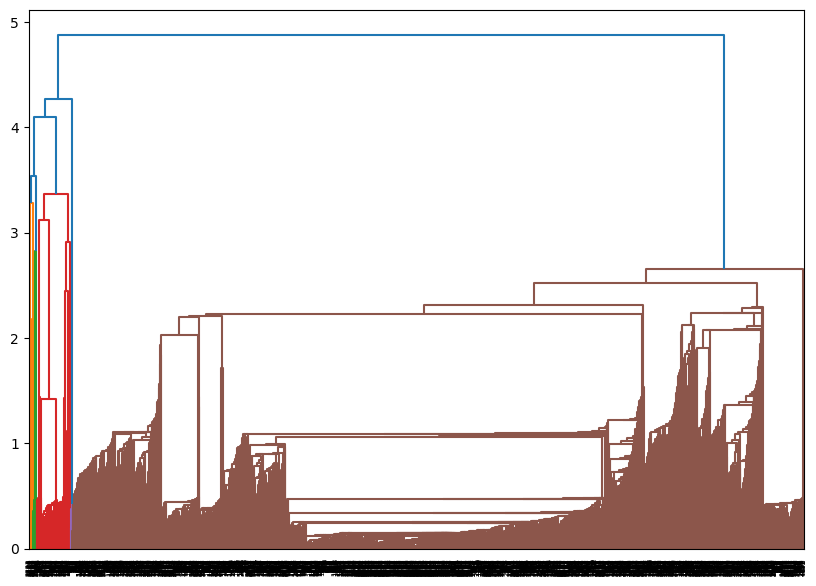

In [324]:
# Hierarchical Clustering for single linkage

from scipy.cluster.hierarchy import linkage, dendrogram
linked = linkage(df_final, 'single') # Use 'ward' linkage method, experiment with others if needed
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

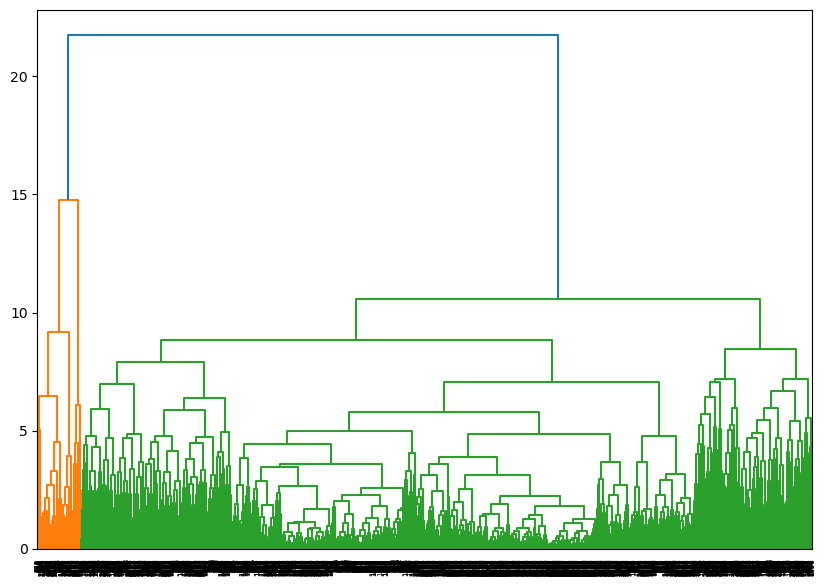

In [327]:
# Hierarchical Clustering for complete linkage

from scipy.cluster.hierarchy import linkage, dendrogram
linked = linkage(df_final, 'complete') # Use 'ward' linkage method, experiment with others if needed
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

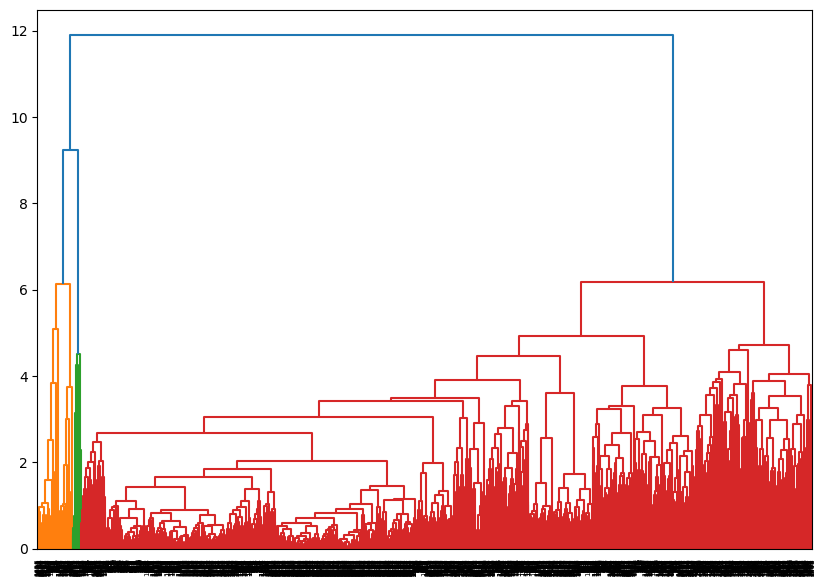

In [330]:
# Hierarchical Clustering average linkage

from scipy.cluster.hierarchy import linkage, dendrogram
linked = linkage(df_final, 'average') # Use 'ward' linkage method, experiment with others if needed
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

Silhouette score for DBSCAN: 0.2706418966590372


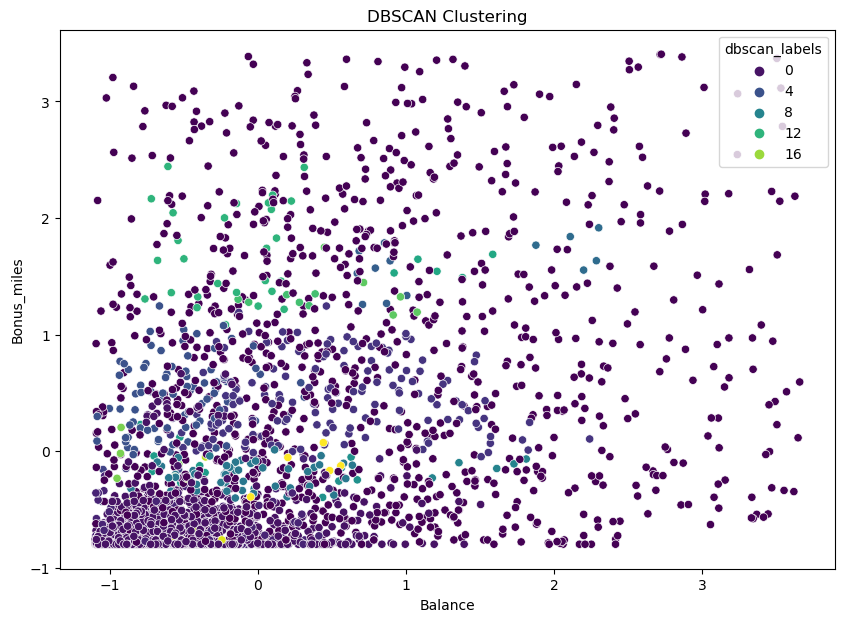

In [362]:
# DBSCAN Clustering

dbscan = DBSCAN(eps=0.5, min_samples=5) # Tune eps and min_samples
dbscan.fit(df_final)
df_final['dbscan_labels'] = dbscan.labels_
print(f"Silhouette score for DBSCAN: {silhouette_score(df_final, df_final['dbscan_labels'])}")

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Balance', y='Bonus_miles', hue='dbscan_labels', data=df_final, palette='viridis')  # Replace with relevant columns for your dataset
plt.title('DBSCAN Clustering')
plt.show()

In [364]:
# Overall Silhouette score is best for Agglomerative single linkage clustering.
# It's Silhouette score is 0.546 which is useful for a good cluster formation

In [342]:
# Calculate the mean of key features for each cluster
kmeans_cluster_means = df_final.groupby('kmeans_labels').mean()
print(kmeans_cluster_means)

                Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
kmeans_labels                                                          
0              0.790287         0.0   0.893225        0.0        0.0   
1             -0.350577         0.0  -0.528616        0.0        0.0   
2             -0.181306         0.0   0.785401        0.0        0.0   

               Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
kmeans_labels                                                                 
0                 0.953014     0.779896           0.737923         0.721476   
1                -0.509606    -0.440645          -0.315647        -0.304717   
2                 0.431045     0.529376          -0.256828        -0.280238   

               Days_since_enroll    Award?  Agg_single  dbscan_labels  
kmeans_labels                                                          
0                       0.334907  0.519841    2.386792      -1.000000  
1                      -0.1

In [366]:
''' 
   -Cluster 0 has a high mean for 'Balance' and high mean for 'Bonus_miles', 
    it could represent that if the peole have high balace then they can travel more miles as a bonus
   -Cluster 1 represent low balance and low bonus miles.
   -Cluster 2 represent moderate travelling.
'''

" \n   -Cluster 0 has a high mean for 'Balance' and high mean for 'Bonus_miles', \n    it could represent that if the peole have high balace then they can travel more miles as a bonus\n   -Cluster 1 represent low balance and low bonus miles.\n   -Cluster 2 represent moderate travelling.\n"

In [346]:
# Analyze DBSCAN Clusters
# DBSCAN might have a different number of clusters than K-means and might identify noise points as -1
dbscan_cluster_counts = df_final['dbscan_labels'].value_counts()
print(dbscan_cluster_counts)

# Analyze the characteristics of each DBSCAN cluster
dbscan_cluster_means = df_final.groupby('dbscan_labels').mean()
dbscan_cluster_means

dbscan_labels
 0     1185
-1     1150
 2      151
 1      140
 4       82
 7       56
 12      28
 16       9
 10       8
 5        8
 13       6
 15       6
 18       6
 9        5
 3        5
 8        5
 6        5
 11       5
 14       5
 17       5
 19       5
Name: count, dtype: int64


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,kmeans_labels,Agg_single
dbscan_labels,,,,,,,,,,,,,
-1,0.622497,0.0,0.530853,0.0,0.0,0.628768,0.555291,0.542899,0.587654,0.244461,0.394070,0.262609,2.596522
0,-0.564966,0.0,-0.719055,0.0,0.0,-0.678737,-0.647715,-0.378837,-0.409708,-0.253845,-0.623072,1.000000,4.000000
1,-0.544049,0.0,-0.719055,0.0,0.0,-0.627924,-0.684606,-0.378837,-0.409708,0.090222,1.604952,1.000000,4.000000
2,0.494143,0.0,1.013789,0.0,0.0,0.451739,0.611455,-0.378837,-0.409708,-0.030169,-0.623072,1.000000,4.000000
3,-0.870219,0.0,0.147367,0.0,0.0,-0.203995,0.543625,-0.378837,-0.409708,1.762444,1.604952,1.000000,4.000000
4,-0.539321,0.0,1.013789,0.0,0.0,0.486432,0.678600,-0.378837,-0.409708,0.156476,1.604952,2.000000,4.000000
5,0.809271,0.0,1.880210,0.0,0.0,1.512404,0.885466,-0.378837,-0.409708,1.174566,-0.623072,2.000000,0.000000
6,2.153676,0.0,1.880210,0.0,0.0,1.742696,0.801618,-0.378837,-0.409708,0.987952,-0.623072,2.000000,0.000000
7,-0.173142,0.0,0.147367,0.0,0.0,-0.223683,0.530726,-0.378837,-0.409708,-0.338265,-0.623072,2.000000,0.000000


In [ ]:
# The first label is a noise point.It doesnot fit for any dense cluster

In [ ]:
# Overall Silhouette score is best for Agglomerative single linkage clustering.
# It's Silhouette score is 0.576 which is useful for a good cluster formation